<a href="https://colab.research.google.com/github/raeq-debug/todo-list-app/blob/main/Netflix_Trends_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


This chart shows that TV Shows have grown rapidly in the last 5 years.

In [2]:
# Check for missing values
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [4]:
# Drop rows where important columns are missing (e.g., title or type)
df.dropna(subset=['title', 'type', 'date_added', 'listed_in'], inplace=True)

# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

# Extract year from 'date_added' for trend analysis
df['year_added'] = df['date_added'].dt.year

# Split genres into multiple rows (for better genre analysis)
df['genres'] = df['listed_in'].str.split(', ')


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Netflix data
df = pd.read_csv("netflix_titles.csv")

# Strip leading/trailing spaces and safely convert to datetime
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

# Create a new column with the release year
df['year_added'] = df['date_added'].dt.year

# Split genres into lists for better analysis
df['genres'] = df['listed_in'].str.split(', ')



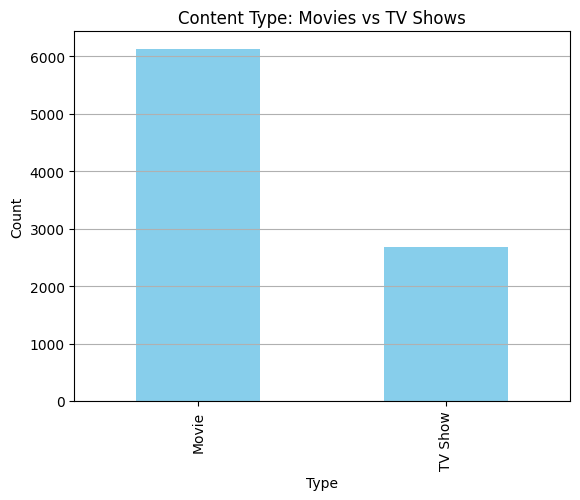

In [6]:
# Show the distribution of content types
df['type'].value_counts().plot(kind='bar', color='skyblue')

plt.title("Content Type: Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

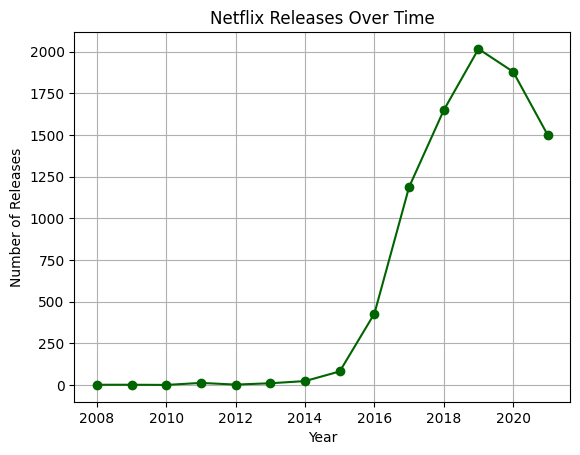

In [7]:
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o', color='darkgreen')

plt.title("Netflix Releases Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.grid(True)
plt.show()



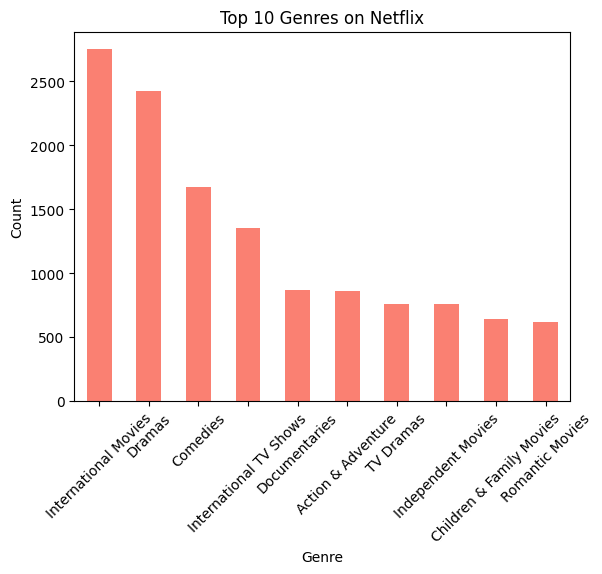

In [8]:
df.explode('genres')['genres'].value_counts().head(10).plot(kind='bar', color='salmon')

plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')